### Statistical Inference: Bootstrap Confidence Interval

This notebook demostrates how to construct confidence interval of a statistic using the bootstrap method. We will also examine the coverage probability of CI.

- Construct Bootstrap Confidence Interval
- Check the coverage probability
- Bootstrap CI for correlation coefficient

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate some random data
data = np.random.randn(100)*10 + 20

data

array([1.46274894e+01, 2.84344025e+01, 9.23750073e+00, 1.93071002e+01,
       1.72213534e+01, 1.12673756e+01, 1.01322067e+01, 1.58247063e+01,
       1.76526185e+01, 1.13738752e+01, 3.52922384e+01, 3.09789730e+01,
       1.95925750e+01, 3.32582273e+01, 1.81267380e+01, 1.51719692e+01,
       1.42107282e+01, 1.66747780e+00, 1.89247742e+01, 2.61201712e+01,
       1.55988365e+01, 1.51825860e+01, 1.15271610e+01, 1.13792076e+01,
       1.19626074e+01, 3.50123986e+01, 1.82539946e+01, 1.87618963e+01,
       2.89696617e+00, 1.87369300e+01, 3.38674945e+01, 2.51787074e+01,
       2.80262714e+01, 3.07736128e+01, 1.71131789e+01, 2.55984907e+01,
       1.86132886e+01, 5.42853899e+00, 2.50233032e+01, 5.14556297e-03,
       1.43733479e+01, 2.11861348e+01, 3.18284814e+01, 2.76942338e+01,
       1.37569703e+01, 1.63002383e+01, 2.01836825e+00, 1.43540010e+01,
       2.66028598e+01, 2.08680221e+01, 2.34422139e+01, 3.89867767e+01,
       2.00088129e+01, 1.29264573e+00, 1.75453954e+01, 7.56681236e+00,
      

(array([ 7.,  9., 16., 29., 11., 11., 12.,  5.]),
 array([5.14556297e-03, 5.07630605e+00, 1.01474665e+01, 1.52186270e+01,
        2.02897875e+01, 2.53609480e+01, 3.04321085e+01, 3.55032689e+01,
        4.05744294e+01]),
 <BarContainer object of 8 artists>)

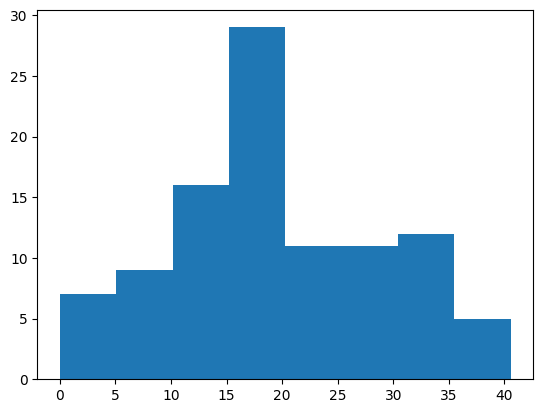

In [3]:
plt.hist(data,bins=8)

In [4]:
print("Population mean is:", np.mean(data))

print("Population variance is:", np.var(data))

Population mean is: 19.504836025861444
Population variance is: 90.91223227981676


In [5]:
#One sample with 30 numbers, this is what we have in hand.

sample_30 = np.random.choice(data, 30, replace=True)

sample_30

array([25.59849068, 11.96260737, 18.12673798, 14.35400098, 14.35400098,
       29.19165117,  9.97967957, 18.73693001,  2.78472185,  2.01836825,
       21.39922355,  5.42853899, 14.37334791,  5.09568   , 15.59883653,
       31.82848144, 21.39922355, 32.07035799, 15.33746411, 31.82848144,
       27.56402887,  0.36038959, 22.61250377, 20.00881292, 27.69423377,
       25.97039694, 11.52716101,  1.6674778 , 14.43479276, 28.02627137])

1. Construct Bootstrap CI

In [6]:
#Define a bootstrap function:
def bootstrap(sample):
    
    bootstrap_mean_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sub-sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Calculatet the mean and std of the bootstrap sampling distribution
    bootstrap_mean = np.mean(bootstrap_mean_list)
    boostrap_std = np.std(bootstrap_mean_list)
    
    # mean +- 2*std for an approximate 95% CI.
    CI = [(bootstrap_mean - 2*boostrap_std), (bootstrap_mean + 2*boostrap_std)]
    
    return CI,bootstrap_mean_list
    

In [7]:
#Do the same thing for the percentile-based method:
def bootstrap_perc(sample):
    
    bootstrap_mean_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_mean_list, 2.5), 
          np.percentile(bootstrap_mean_list, 97.5)]
    
    return percentile_CI,bootstrap_mean_list
    

In [8]:
#Define a anlytical based function:
def anlytical(sample):    
    sample_mean = np.mean(sample)
    
    err_of_margin = 2*np.std(sample)/np.sqrt(len(sample))
    
    # mean +- 2*std for an approximate 95% CI.
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    CI = [CI_lower, CI_upper]
    
    return CI

Compare the bootstrap vs. analytical CI:

In [9]:
bootstrap_CI, bootstrap_mean_list = bootstrap(sample_30)
bootstrap_CI_perc, bootstrap_mean_list_perc = bootstrap_perc(sample_30)
analytical_CI = anlytical(sample_30)

In [10]:
print("95% analytical CI: ", analytical_CI)
print("95% bootstrap CI: ", bootstrap_CI)
print("95% percentile-based bootstrap CI: ", bootstrap_CI_perc)

95% analytical CI:  [13.883227582220599, 20.87229862734798]
95% bootstrap CI:  [13.86685411839715, 20.900962249897454]
95% percentile-based bootstrap CI:  [13.93033076385974, 20.75766936631841]


2. Testing the coverage of the 95% CI for 
- Bootstrap
- Percentile based Bootstrap
- Analytical

In [11]:
%%time
#generate samples for multiple times
counter = 0
counter_perc = 0
true_mean = np.mean(data)

for i in range(1000):
    #generate a sample with 30 numbers
    sample = np.random.choice(data, 30, replace=True)
    
    #For each sample, we compute the two CIs:
    ci,_ = bootstrap(sample)
    perc_ci,_ = bootstrap_perc(sample)
    analytical_ci = anlytical(sample)
    
    #Check the coverage
    if ci[0] <= true_mean <= ci[1]:
        counter = counter + 1
        
    if perc_ci[0] <= true_mean <= perc_ci[1]:
        counter_perc = counter_perc + 1

CPU times: user 3min 20s, sys: 4.38 s, total: 3min 25s
Wall time: 3min 44s


In [12]:
print("Number of times 95% bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% bootstrap CI covered the population mean: 939 out of 1000


In [13]:
print("Number of times 95% percentile-based bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% percentile-based bootstrap CI covered the population mean: 939 out of 1000


In [14]:
print("Number of times 95% analytical CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% analytical CI covered the population mean: 939 out of 1000


3. Bootstrap confidence interval for correlation coefficients

In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
df = pd.read_csv(url)
df = df.dropna()

Text(0, 0.5, 'Acceleration')

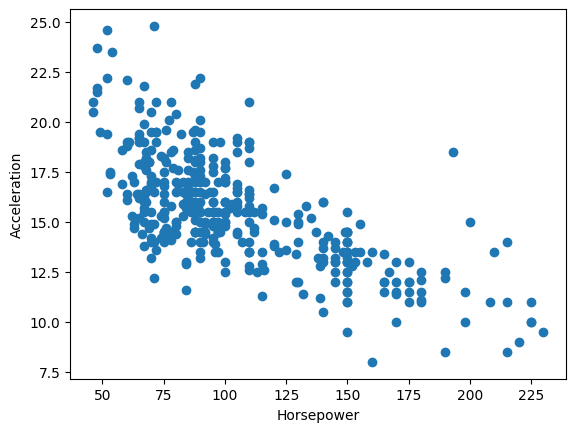

In [16]:
from scipy.stats import *

plt.scatter(df.horsepower, df.acceleration)
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")

In [17]:
print("Pearson:",pearsonr(df.horsepower, df.acceleration))

Pearson: PearsonRResult(statistic=-0.6891955103342371, pvalue=1.5818862297811214e-56)


In [18]:
sample_car = df.sample(frac=0.3,replace=True)
sample_car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
161,16.0,6,250.0,105.0,3897,18.5,75,usa,chevroelt chevelle malibu
331,33.8,4,97.0,67.0,2145,18.0,80,japan,subaru dl
20,25.0,4,110.0,87.0,2672,17.5,70,europe,peugeot 504
147,24.0,4,90.0,75.0,2108,15.5,74,europe,fiat 128
86,14.0,8,304.0,150.0,3672,11.5,73,usa,amc matador
...,...,...,...,...,...,...,...,...,...
56,26.0,4,91.0,70.0,1955,20.5,71,usa,plymouth cricket
220,33.5,4,85.0,70.0,1945,16.8,77,japan,datsun f-10 hatchback
166,13.0,8,302.0,129.0,3169,12.0,75,usa,ford mustang ii
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4


In [19]:
print("Pearson:",pearsonr(sample_car.horsepower, sample_car.acceleration))

Pearson: PearsonRResult(statistic=-0.7206174401190429, pvalue=3.605587241031265e-20)


In [20]:
#Define a bootstrap function:
np.random.seed(222)
def bootstrap_pearson(sample_car):
    
    bootstrap_cor_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = sample_car.sample(len(sample), replace=True)
        
        #compute correlation
        sample_cor = pearsonr(subsample.horsepower, subsample.acceleration)[0]

        bootstrap_cor_list.append(sample_cor)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_cor_list, 2.5), 
          np.percentile(bootstrap_cor_list, 97.5)]
    
    return percentile_CI
    

In [21]:
bootstrap_pearson(sample_car)

[-0.8597533231885832, -0.494034758123596]

In [22]:
print("95% confidence interval of the Pearson correlation coefficient is:",
     "[-0.86 to -0.29]")


95% confidence interval of the Pearson correlation coefficient is: [-0.86 to -0.29]


We are 95% confident that the true correlation of HP and ACC in the population is between -0.86 to -0.29.

In this case, the CI doesn't cover 0, which means population correlation coefficient is not zero. So the negative trend we observe from the sample isn't just becuase of the sampling variation but because the true correlation is negative in the population.